# Let's compare accuracy of some models

## Import the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys
from helpers.highlevel_sceneloader import HighLevelSceneLoader
from predictors.dataset_creator import TFDataSet
from helpers.accuracy_functions import return_batch_accuracy, return_ds_accuracy
import tensorflow as tf
from predictors.dl_trainer import DLTrainer 
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pickle
import numpy as np
from helpers.graph import Graph

## Import the data

In [3]:
ROOT = os.getcwd()

rel_p_img_b = 'helpers/analysed_vars_storage/img_bounds.xml'
rel_p_dests = 'helpers/analysed_vars_storage/destination_locations.xml'
p_img_bounds = os.path.join(ROOT, rel_p_img_b)
p_dest_locs = os.path.join(ROOT, rel_p_dests)

#TODO: older version of OpenTraj needed: "git checkout d249ba6951dd0f54b532fbe2ca6edc46b0d7093f"
opentraj_root = os.path.join(ROOT, 'OpenTraj')
root_datasets = os.path.join(ROOT, 'data/path_data')
sys.path.append(opentraj_root) # add package to pythonpath

scene_data = HighLevelSceneLoader(p_img_bounds, p_dest_locs)
scene_data.load_ind(root_datasets, 7, 17)

x_min
0.
y_min
-75.
x_max
110.
y_max
-2.
x_min
0.
y_min
-75.
x_max
110.
y_max
-2.
Index 8 and length 3147
Index 9 and length 3982
Index 10 and length 4808
Index 11 and length 6069
Index 12 and length 8230
Index 13 and length 10002
Index 14 and length 12038
Index 15 and length 13448
Index 16 and length 16217
Index 17 and length 18106


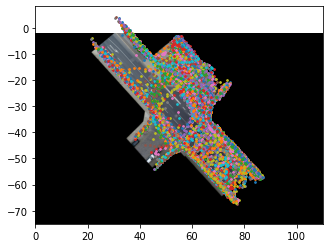

In [4]:
scene_data.plot_all_paths()

## Make the graph

In [5]:
def __return_waypoints_ind():
    d = np.array([
    [ 65, -36],
    [ 56, -21],
    [ 66, -46],
    [ 58, -48],
    [ 67, -29],
    [ 61, -16],
    [ 45, -32],
    [ 71, -43],
    [ 80, -52],
    [ 68, -58],
    [ 65, -54],
    [ 48, -20],
    [ 64, -21],
    [ 46, -14]])
    return d
    
interest_points = __return_waypoints_ind()

g = Graph.from_matrices(interest_points, scene_data.destination_matrix, 4, .05)

df_signals = scene_data.df_to_lst_realxy_mats()
g.analyse_multiple_full_signals(df_signals, add_to_trams_mat=True)

/home/bram/Documents/thesis_DAI/uni_repo/vru-location-prediction/helpers/graph.py:111: Warning: Unused path in transition matrix due to not reaching two waypoints
  warnings.warn("Unused path in transition matrix due to not reaching two waypoints", Warning)


[(array(['w7', 'w8', 'd3'], dtype='<U2'),
  [(71, -43), (80, -52), (85.0, -57.0)]),
 (array(['wd'], dtype='<U2'), [(46, -14)]),
 (array(['wd', 'd6'], dtype='<U2'), [(46, -14), (36.0, -3.0)]),
 (array(['d7', 'w6', 'w3', 'wa', 'w9'], dtype='<U2'),
  [(27.0, -9.0), (45, -32), (58, -48), (65, -54), (68, -58)]),
 (array(['d7'], dtype='<U2'), [(27.0, -9.0)]),
 (array(['w9', 'wa', 'w3', 'w6', 'd7'], dtype='<U2'),
  [(68, -58), (65, -54), (58, -48), (45, -32), (27.0, -9.0)]),
 (array(['w3'], dtype='<U2'), [(58, -48)]),
 (array(['w8', 'w7', 'w0', 'w4', 'wc', 'w5'], dtype='<U2'),
  [(80, -52), (71, -43), (65, -36), (67, -29), (64, -21), (61, -16)]),
 (array(['d4', 'w4', 'w0', 'w7', 'w8'], dtype='<U2'),
  [(72.0, -24.0), (67, -29), (65, -36), (71, -43), (80, -52)]),
 (array(['w8', 'w7', 'w0', 'w4', 'wc', 'w5'], dtype='<U2'),
  [(80, -52), (71, -43), (65, -36), (67, -29), (64, -21), (61, -16)]),
 (array(['w9', 'wa', 'w3', 'w6', 'd7'], dtype='<U2'),
  [(68, -58), (65, -54), (58, -48), (45, -32), (2

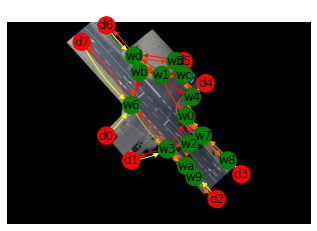

In [13]:
my_graph = g.create_graph(.05)
g.recalculate_trans_mat_dependencies()
g.visualize_graph(my_graph, 'data/images/graphs/graph_with_image.png', scene_loader = scene_data)

## Global Parameters

In [7]:
# Dataset parameters
#   PRE
DS_LOCATION = "data/pickle/ds_creation_d/all_f_fixed_length/ds3.pickle"
SEQ_IN_LENGTH = 5
SEQ_OUT_LENGTH = 3
VARIABLE_INPUT_LENGTH = False
BATCH_SIZE=5
#   POST
NOISE_STD = .2
N_REPEATS = 1

# Model parameters
LSTM_LAYER_SIZE = 64
DENSE_LAYER_SIZE = 128
NUM_LSTM_LAYERS = 2
NUM_DENSE_LAYERS = 2

# Training parameters
MAX_EPOCHS = 100
PATIENCE = 10





## Training the models

### Baseline: no extra features

#### Create Dataset 

In [26]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

extra_features_dict = {
        "all_points_after": None,
        "n_points_after": 6,
        "all_destinations": None,
    }

# Load data in order to not need to do calculations again
# with open(DS_LOCATION, 'rb') as handle:
#     my_ds_creation_dict = pickle.load(handle)

my_ds = TFDataSet.init_as_fixed_length(scene_data.traj_dataframe, graph=g, scale_list=["pos_x", "pos_y"], seq_in_length=SEQ_IN_LENGTH, label_length=SEQ_OUT_LENGTH, seq_stride=1,
extra_features_dict=extra_features_dict, noise_std=NOISE_STD, n_repeats = N_REPEATS, batch_size=BATCH_SIZE, save_folder=DS_LOCATION) # , ds_creation_dict=my_ds_creation_dict

100%|██████████| 76/76 [01:16<00:00,  1.01s/it]


oops
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok

#### Create Model

### Added Feature: All Destinations

In [27]:
my_trainer_all_dests = DLTrainer(max_epochs=MAX_EPOCHS, patience=PATIENCE)
network = my_trainer_all_dests.LSTM_one_shot_predictor_named_i(my_ds, LSTM_LAYER_SIZE, DENSE_LAYER_SIZE, 
NUM_LSTM_LAYERS, NUM_DENSE_LAYERS, extra_features=["all_destinations"], var_time_len=VARIABLE_INPUT_LENGTH)

print(my_trainer_all_dests.model.summary())

save_path = "data/model_weights/model12.h5"

try:
    my_trainer_all_dests.load_weights(save_path)
except:
    my_trainer_all_dests.compile_and_fit(my_ds, save_path)





5
KerasTensor(type_spec=TensorSpec(shape=(None, 5, 2), dtype=tf.float32, name='in_xy'), name='in_xy', description="created by layer 'in_xy'")
KerasTensor(type_spec=TensorSpec(shape=(None, 64), dtype=tf.float32, name=None), name='flatten/Reshape:0', description="created by layer 'flatten'")
KerasTensor(type_spec=TensorSpec(shape=(None, 8, 3), dtype=tf.float32, name='all_destinations'), name='all_destinations', description="created by layer 'all_destinations'")
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Total params: 62,342
Trainable params: 62,342
Non-trainable params: 0
__________________________________________________________________________________________________
None
Epoch 1/100
1755/1755 [==============================] - 62s 32ms/step - loss: 0.0617 - mean_absolute_error: 0.1687 - val_loss: 0.0262 - val_mean_abs

### Added feature: All points

In [42]:
my_trainer_all_points = DLTrainer(max_epochs=MAX_EPOCHS, patience=PATIENCE)
network = my_trainer_all_points.LSTM_one_shot_predictor_named_i(my_ds, LSTM_LAYER_SIZE, DENSE_LAYER_SIZE, 
NUM_LSTM_LAYERS, NUM_DENSE_LAYERS, extra_features=["all_points"])

save_path = "data/model_weights/m_all_points.h5"

try:
    my_trainer_all_points.load_weights(save_path)
except:
    my_trainer_all_points.compile_and_fit(my_ds, save_path)

TypeError: LSTM_one_shot_predictor_named_i() missing 1 required positional argument: 'var_time_len'

## Getting some accuracy stats

In [14]:
# Get an example path   
normed, denormed = my_ds.example_dict("train", "in_xy")
my_in_n, my_out_n = normed
my_in, my_out = denormed

(8, 1)
(8, 2)


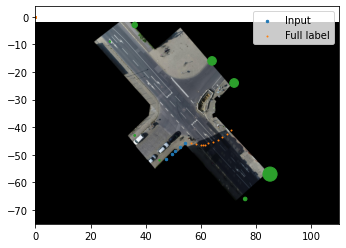

In [20]:
# Visualize an input path
fig_vis, ax_vis = plt.subplots()
id = 0
scene_data.plot_on_image([my_in["in_xy"][id], my_in["labels"][id]], 
save_path='data/images/extra_f/in_out.png', ms = [6, 1], ax=ax_vis,
col_num_dicts=[my_ds.generalised_in_dict, my_ds.generalised_out_dict],
labels=["Input", "Full label"])

dest_locs = my_in["all_destinations"][id][:, 0:2]
dest_probs = my_in["all_destinations"][id][:, 2:3]

scene_data.plot_dest_probs(dest_locs, dest_probs, 2, 200,
ax = ax_vis, save_path = None)

In [142]:
# Do a prediction
predicted_out_n, predicted_out = my_trainer_all_dests.predict_dict(my_in_n, scale_input_tensor=False)
predicted_rep_out = my_trainer_all_dests.predict_repetitively_dict(my_in_n, scale_input_tensor=False,
num_repetitions=8,fixed_len_input=True)

tf.Tensor(
[[[-6.6309339e-01  1.9141352e+00]
  [-4.9527505e-01  1.7361379e+00]
  [-4.7897688e-01  1.6689842e+00]
  [-3.9616582e-01  1.5920750e+00]
  [-3.5548264e-01  1.5463368e+00]
  [ 2.6185992e-01  1.9253883e-01]
  [-3.2497478e-01  8.1571788e-02]
  [-8.8367313e-03  1.9494675e-02]]

 [[-9.4424289e-01  1.1510394e+00]
  [-8.8533503e-01  1.0271780e+00]
  [-6.9029355e-01  1.0838957e+00]
  [-5.3889698e-01  9.6448600e-01]
  [-3.7051582e-01  8.4292799e-01]
  [ 2.5231135e-01  1.9866881e-01]
  [-3.3316559e-01  8.5223302e-02]
  [-3.8143024e-03  1.7483979e-02]]

 [[ 3.8177130e-01 -1.4924677e-01]
  [ 4.9514556e-01 -2.1240410e-01]
  [ 5.8159518e-01 -2.3745465e-01]
  [ 7.3714793e-01 -4.3355471e-01]
  [ 8.5817385e-01 -4.4593674e-01]
  [ 2.9370615e-01  1.6666247e-01]
  [-3.1138191e-01  9.2296861e-02]
  [-1.6013369e-02  4.5479909e-03]]

 [[ 3.1614029e-01  5.3067493e-01]
  [ 3.0553138e-01  4.3001705e-01]
  [ 1.6933466e-01  2.2785854e-01]
  [ 2.3312485e-01  1.5244408e-01]
  [ 3.1707561e-01  1.8275363e-0

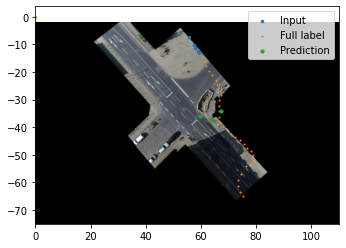

In [143]:
fig1, ax1 = plt.subplots()
id = 0
scene_data.plot_on_image([my_in["in_xy"][id], my_in["labels"][id], predicted_out[id]], 
save_path='data/images/extra_f/in_out.png', ms = [6, 1, 10], ax=ax1,
col_num_dicts=[my_ds.generalised_in_dict, my_ds.generalised_out_dict, my_ds.generalised_out_dict],
labels=["Input", "Full label", "Prediction"])

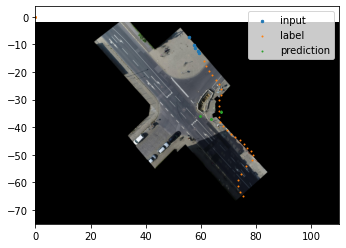

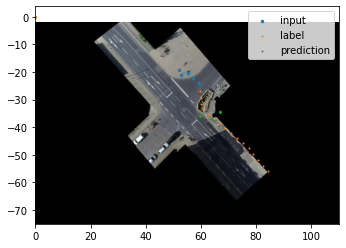

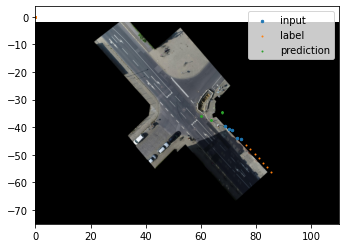

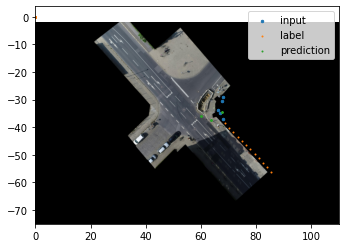

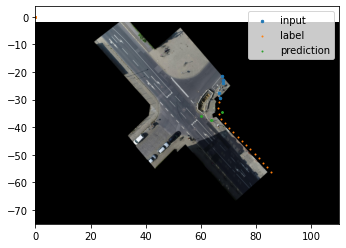

In [144]:
figs=[]
axs=[]
for i in range(BATCH_SIZE): 
    id = i   
    fig, ax = plt.subplots()
    figs.append(fig)
    axs.append(ax)

    scene_data.plot_on_image([my_in["in_xy"][id], my_in["labels"][id], predicted_rep_out[id]], 
    save_path='data/images/extra_f/in_out.png', ms = [6, 1, 1], ax=axs[i],
    col_num_dicts=[my_ds.generalised_in_dict, my_ds.generalised_out_dict, my_ds.generalised_out_dict],
    labels=["input", "label", "prediction"])

### Get the statistics for this model

In [49]:
# Getting an accuracy statistic

lst_accs = []
lst_accs_rep = []
for batch in iter(my_ds.tf_ds_dict["test"]):
    # Do a prediction
    predicted_out_n, predicted_out = my_trainer_all_dests.predict_dict(my_in_n, scale_input_tensor=False)
    predicted_rep_out = my_trainer_all_dests.predict_repetitively_dict(my_in_n, scale_input_tensor=False,
    num_repetitions=3,fixed_len_input=True)
    # Get the accuracies
    acc1 = return_batch_accuracy(predicted_out, my_in["labels"])
    acc2 = return_batch_accuracy(predicted_rep_out, my_in["labels"])
    # Get the 
    lst_accs = lst_accs + acc1[0]
    lst_accs_rep = lst_accs_rep + acc2[0]


np_accs = np.array(lst_accs)
np_accs_rep = np.array(lst_accs_rep)

tf.Tensor(
[[[-1.3185997  -0.90916955]
  [-1.1549456  -0.7939846 ]
  [-1.0455769  -0.71736926]
  [-0.9084162  -0.6298214 ]
  [-0.7749506  -0.537402  ]
  [-0.7044953  -0.5123866 ]
  [-0.63734436 -0.4748444 ]
  [-0.55566293 -0.5290704 ]]

 [[ 0.39344496 -0.21393725]
  [ 0.55109024 -0.29896373]
  [ 0.72438014 -0.4195083 ]
  [ 0.9016402  -0.5384133 ]
  [ 1.0735792  -0.6663796 ]
  [ 1.1076599  -0.78651565]
  [ 1.2506474  -0.9048212 ]
  [ 1.3178333  -1.0189772 ]]

 [[ 0.5623351  -0.30001006]
  [ 0.74117947 -0.40084302]
  [ 0.86777586 -0.55862695]
  [ 1.0505618  -0.6849732 ]
  [ 1.2286351  -0.7842107 ]
  [ 1.2332491  -0.9096768 ]
  [ 1.3737189  -1.0344604 ]
  [ 1.4281127  -1.1539705 ]]

 [[-0.42126974  1.6677616 ]
  [-0.36029828  1.5799865 ]
  [-0.31625676  1.474186  ]
  [-0.20869131  1.3671532 ]
  [-0.15267083  1.2441142 ]
  [-0.01226121  1.1718879 ]
  [ 0.00222966  1.0447494 ]
  [ 0.04423016  0.9027675 ]]

 [[-1.5826621   1.7012641 ]
  [-1.4399244   1.5583858 ]
  [-1.3294003   1.4350748 ]
 

In [50]:
print(np.average(np_accs))
print(np.std(np_accs))
print(np.average(lst_accs_rep))
print(np.std(lst_accs_rep))

1.5022319718674377
0.5647728760606993
2.1711355212420185
1.234013181643873


### Influence of the destination

#### Let's edit the destination probability and see the consequence

In [198]:
# Get an example path   
normed, denormed = my_ds.example_dict("train", "in_xy")
my_in_n, my_out_n = normed
my_in, my_out = denormed

In [202]:
# Now adjust the deestination probs
# get one hot vector for 100% on one destination
dest_num = [2]
new_probs = tf.one_hot(
    [dest_num], 8, on_value=None, off_value=None, axis=None, dtype=tf.float64, name=None
)
new_probs = tf.reshape(new_probs, [-1, 1])
lst = [new_probs for i in range(BATCH_SIZE)]
print(new_probs)
new_probs=tf.stack(lst)

# implement the one hot vector
my_in_n_c = dict(my_in_n)
my_in_n_c["all_destinations"]=tf.concat([my_in_n["all_destinations"][:,:,0:2], new_probs], axis=-1)
my_in_c= dict(my_in)
my_in_c["all_destinations"]=tf.concat([my_in["all_destinations"][:,:,0:2], new_probs], axis=-1)

tf.Tensor(
[[0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]], shape=(8, 1), dtype=float64)


In [203]:
# Do a prediction
predicted_out_n, predicted_out = my_trainer_all_dests.predict_dict(my_in_n_c, scale_input_tensor=False)
predicted_rep_out = my_trainer_all_dests.predict_repetitively_dict(my_in_n_c, scale_input_tensor=False,
num_repetitions=3,fixed_len_input=True)

tf.Tensor(
[[[-0.22938694 -0.59079283]
  [-0.1766277  -0.588126  ]
  [-0.10847384 -0.54919106]
  [ 0.02112563 -0.53469884]
  [ 0.20759614 -0.47123563]
  [ 0.305151   -0.4087128 ]
  [ 0.4147156  -0.38708726]
  [ 0.51204604 -0.40225607]]

 [[ 0.11819521 -1.1105021 ]
  [ 0.1968403  -1.1806489 ]
  [ 0.2631281  -1.281414  ]
  [ 0.35879666 -1.3117028 ]
  [ 0.4468835  -1.4027057 ]
  [ 0.48345008 -1.4149671 ]
  [ 0.55540574 -1.440171  ]
  [ 0.6298512  -1.4970957 ]]

 [[-1.1669149   1.3336178 ]
  [-1.0343572   1.2116653 ]
  [-0.9220766   1.1199131 ]
  [-0.8261144   1.0809683 ]
  [-0.67724794  1.0189621 ]
  [-0.5248341   0.9338878 ]
  [-0.43427077  0.82654005]
  [-0.32916236  0.69500184]]

 [[ 0.26482576  0.610857  ]
  [ 0.2205192   0.46123755]
  [ 0.20124722  0.33662596]
  [ 0.18177992  0.16142492]
  [ 0.20134151  0.06660645]
  [ 0.23549052 -0.08990125]
  [ 0.27990833 -0.21707743]
  [ 0.34978324 -0.36003962]]

 [[ 0.49239275 -1.4673439 ]
  [ 0.38725752 -1.3807815 ]
  [ 0.2456308  -1.273132  ]
 

(8, 1)
(8, 2)
(8, 1)
(8, 2)
(8, 1)
(8, 2)
(8, 1)
(8, 2)
(8, 1)
(8, 2)


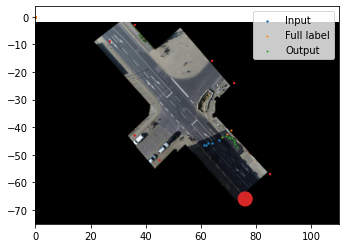

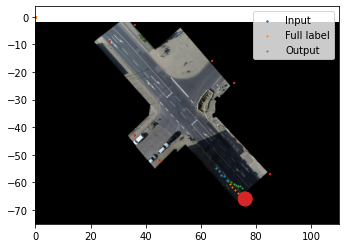

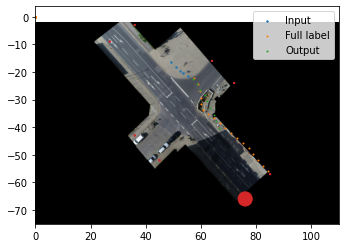

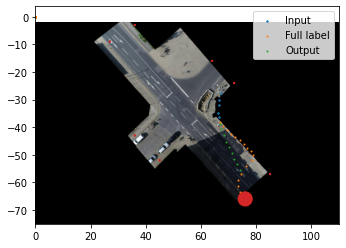

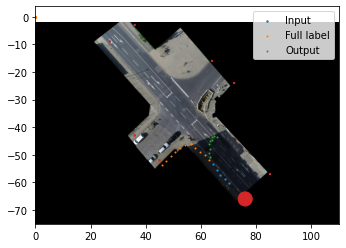

In [205]:
# Visualize an input path

figs=[]
axs=[]
for i in range(BATCH_SIZE): 
    id = i   
    fig, ax = plt.subplots()
    figs.append(fig)
    axs.append(ax)
    scene_data.plot_on_image([my_in_c["in_xy"][id], my_in_c["labels"][id], predicted_rep_out[id]], 
    save_path=None, ms = [2, 1, 1], ax=axs[i],
    col_num_dicts=[my_ds.generalised_in_dict, my_ds.generalised_out_dict, my_ds.generalised_out_dict],
    labels=["Input", "Full label", "Output"])

    dest_locs = my_in_c["all_destinations"][id][:, 0:2]
    dest_probs = my_in_c["all_destinations"][id][:, 2:3]

    scene_data.plot_dest_probs(dest_locs, dest_probs, 2, 200,
    ax = axs[i], save_path = 'data/images/adjusted_dest/3/'+str(i)+'.png')